# TASK-

# Titanic Survival Prediction with Machine Learning

In [1]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data set
df=pd.read_csv("/content/task-1.Titanic dataset.csv")

In [3]:
# get the data of the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# get the data of the last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
# get the data of the random 5 rows
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,949,0,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.650,F G63,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900,C105,C
105,997,0,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.525,NaN,S
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.000,C23 C25 C27,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# count the rows and columns
df.shape

(418, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

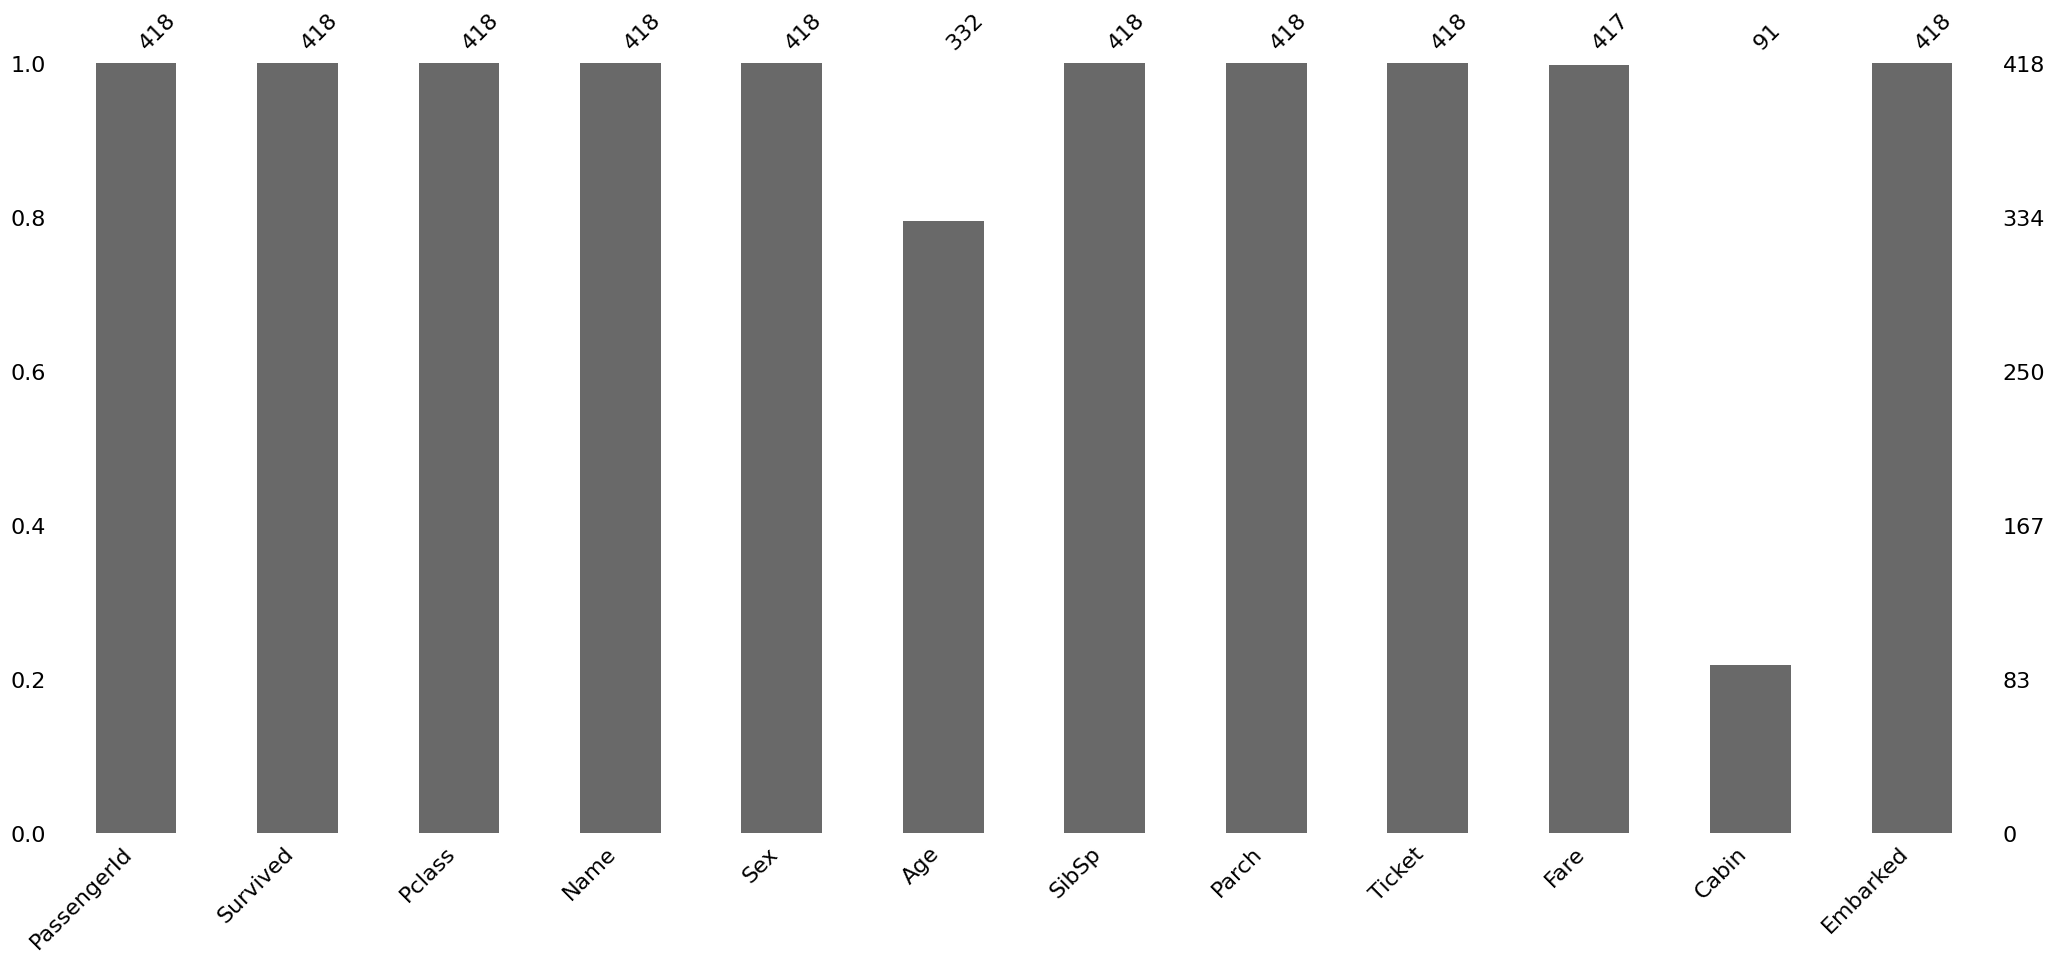

In [9]:
# exploratory the missing values
import missingno as msno
msno.bar(df);

<Axes: >

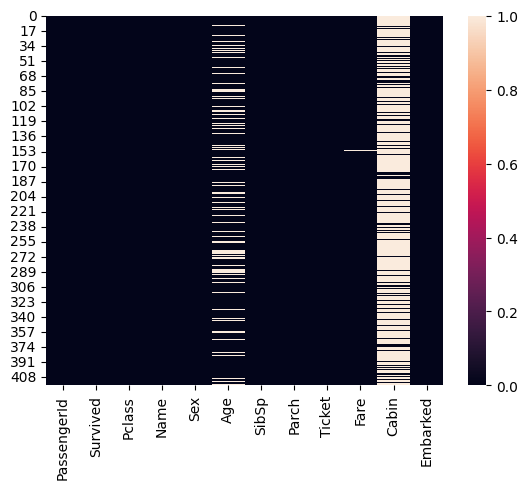

In [10]:
# visualising the missing values
sns.heatmap(df.isnull())

In [11]:
# to display basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [12]:
# Handling Null Values.

df=df.drop(columns='Cabin', axis=1)

In [13]:
# to display basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [14]:
# Replacing the missing values of "Age" column with mean.
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
# check the null values.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
# Deleting the null values in the Fare column
df=df.dropna(subset=["Fare"])

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
#Finding the mean, min, max, and std deviation
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.200103,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.562386,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
# finding number of people has survived and not survived.
df['Survived'].value_counts()

0    265
1    152
Name: Survived, dtype: int64

# Univariate Analysis






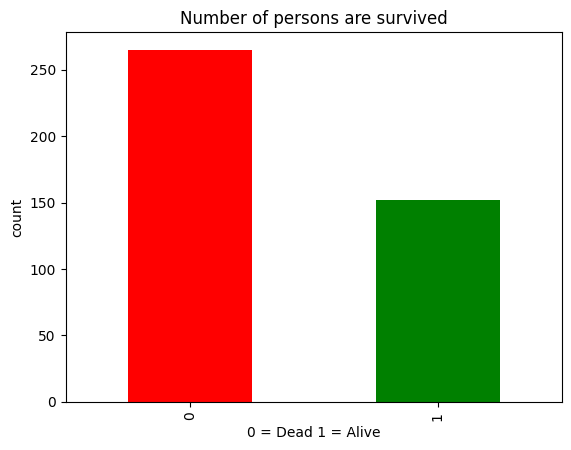

In [20]:
# plotting bar chart for 'survived'.
df.Survived.value_counts().plot(kind = 'bar', color=["red", "green"])
plt.title("Number of persons are survived")
plt.xlabel("0 = Dead 1 = Alive")
plt.ylabel("count");

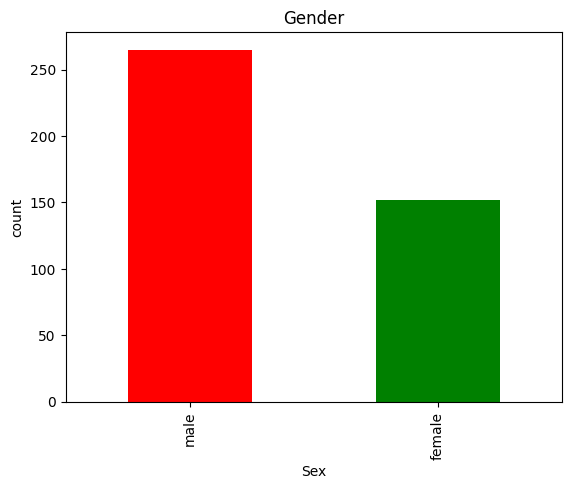

In [21]:
# plotting bar chart for 'Sex'.
df.Sex.value_counts().plot(kind = 'bar', color=["red", "green"])
plt.title("Gender")
plt.xlabel("Sex")
plt.ylabel("count");

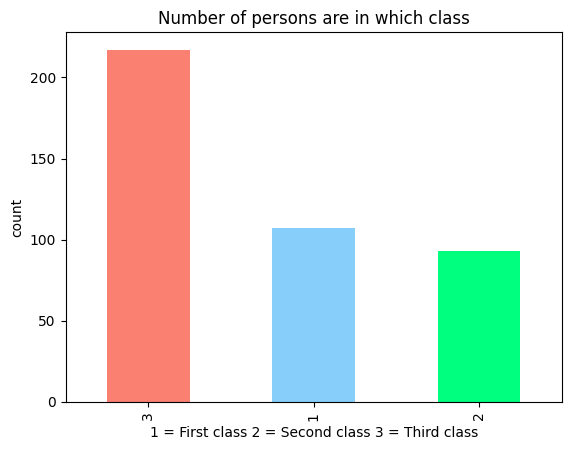

In [22]:
# plotting bar chart for 'pclass'.
df.Pclass.value_counts().plot(kind = 'bar', color=['salmon', 'lightskyblue', 'springgreen'])
plt.title("Number of persons are in which class")
plt.xlabel("1 = First class 2 = Second class 3 = Third class")
plt.ylabel("count");

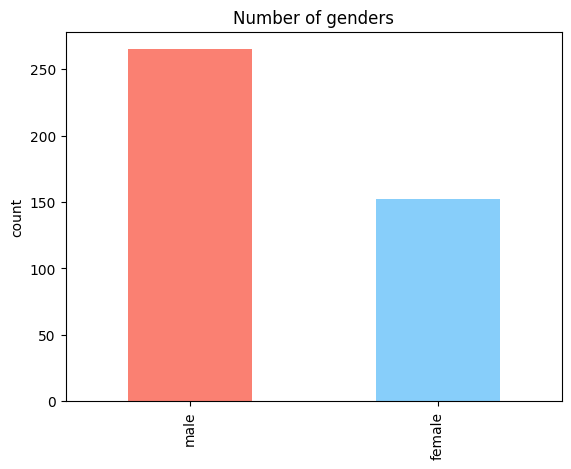

In [23]:
# plotting bar chart for 'Sex'.
df.Sex.value_counts().plot(kind = 'bar', color=['salmon', 'lightskyblue', 'springgreen'])
plt.title("Number of genders")

plt.ylabel("count");

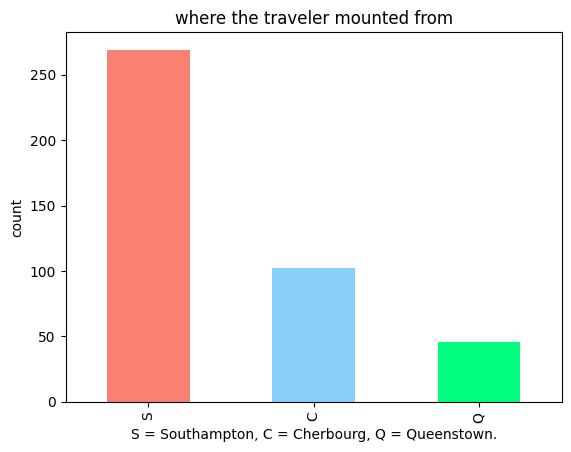

In [24]:
# plotting bar chart for 'Embarked'.
df.Embarked.value_counts().plot(kind = 'bar', color=['salmon', 'lightskyblue', 'springgreen'])
plt.title("where the traveler mounted from")
plt.xlabel("S = Southampton, C = Cherbourg, Q = Queenstown.")
plt.ylabel("count");

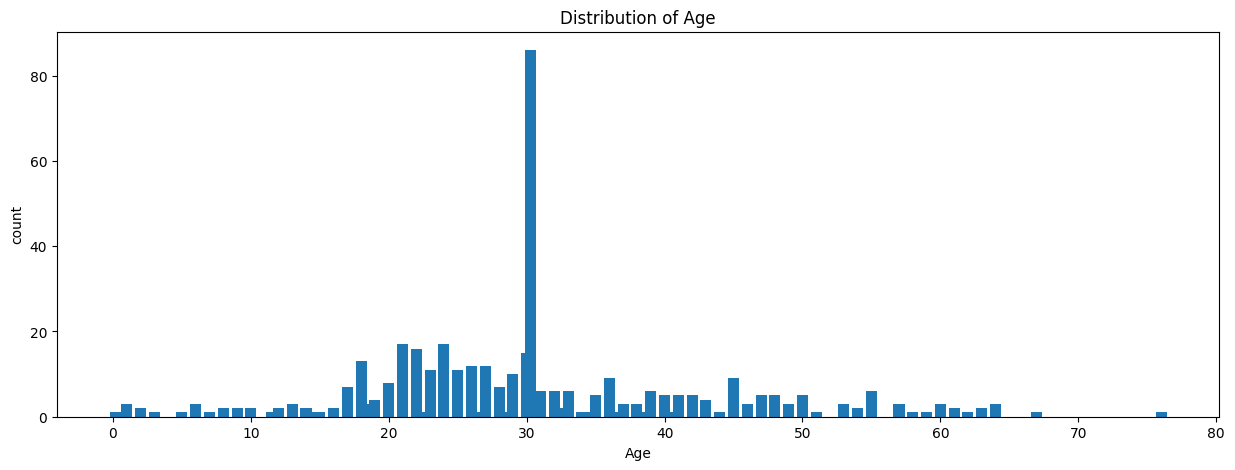

In [25]:
# count number of Birthday_count
Birthday_count=df['Age'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Birthday_count.index,Birthday_count.values)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age')
plt.show()

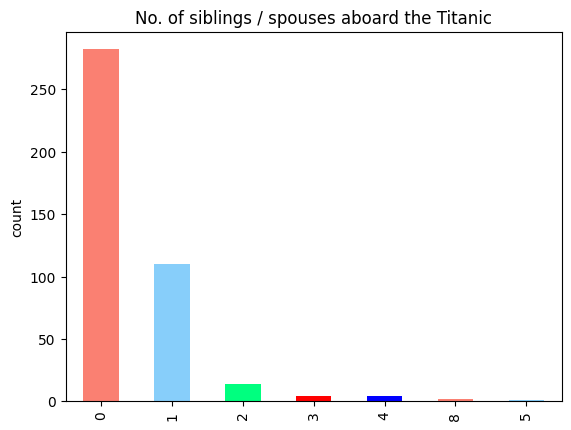

In [26]:
# plotting bar chart for 'Parch'.
df.SibSp.value_counts().plot(kind = 'bar', color=['salmon', 'lightskyblue', 'springgreen','red','blue'])
plt.title("No. of siblings / spouses aboard the Titanic")
plt.ylabel("count");

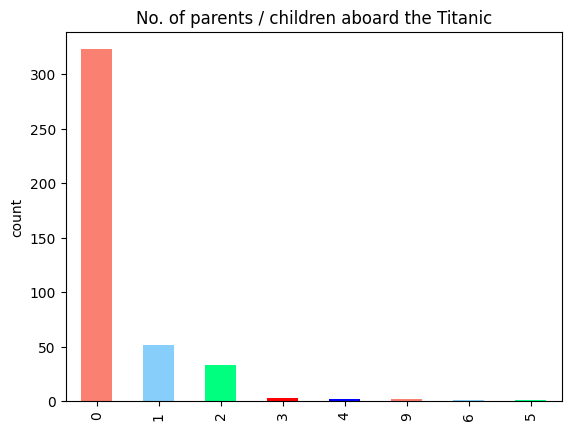

In [27]:
# plotting bar chart for 'Parch'.
df.Parch.value_counts().plot(kind = 'bar', color=['salmon', 'lightskyblue', 'springgreen','red','blue'])
plt.title("No. of parents / children aboard the Titanic")
plt.ylabel("count");

# Bivariate Analysis


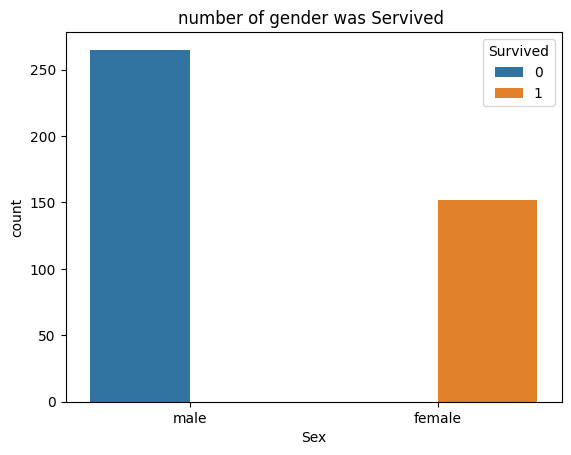

In [28]:
# Create a plot of crosstab for 'Survived' and 'sex' more visual
sns.countplot(x='Sex', hue = 'Survived', data = df)
plt.title("number of gender was Servived ");


In [29]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,0,265
1,152,0


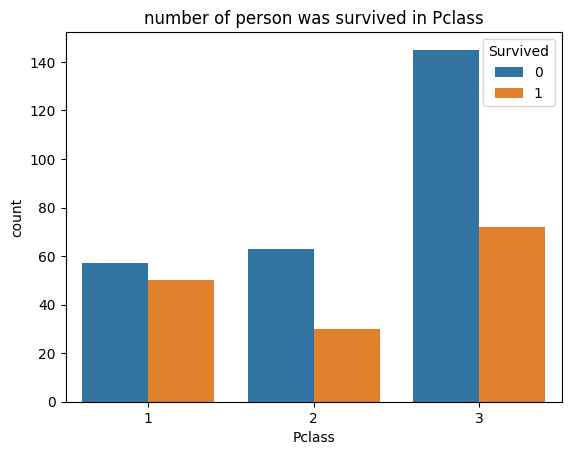

In [30]:
# Create a plot of crosstab for 'Pclass' and 'sex' more visual
sns.countplot(x='Pclass', hue = 'Survived', data = df)
plt.title("number of person was survived in Pclass")
plt.ylabel("count");

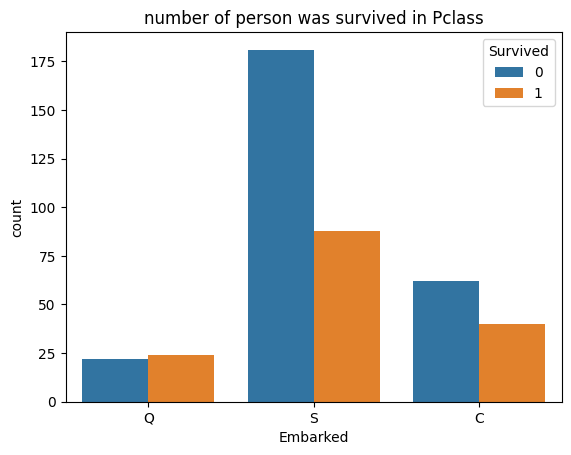

In [31]:
# Create a plot of crosstab for 'Embarked' and 'sex' more visual
sns.countplot(x='Embarked', hue = 'Survived', data = df)
plt.title("number of person was survived in Pclass")
plt.ylabel("count");

# Relation between categorical variables

In [33]:
# Find out the correlation between variables using spearman rank correlation
df1 = df.corr(method='spearman')
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.024173,-0.033216,-0.009629,-0.010944,0.049937,0.020174
Survived,-0.024173,1.000000,-0.099887,-0.023183,0.149344,0.224406,0.204978
Pclass,-0.033216,-0.099887,1.000000,-0.362703,-0.117355,-0.042220,-0.753744
Age,-0.009629,-0.023183,-0.362703,1.000000,-0.022513,-0.108276,0.234449
SibSp,-0.010944,0.149344,-0.117355,-0.022513,1.000000,0.411932,0.441343
Parch,0.049937,0.224406,-0.042220,-0.108276,0.411932,1.000000,0.378496
Fare,0.020174,0.204978,-0.753744,0.234449,0.441343,0.378496,1.000000


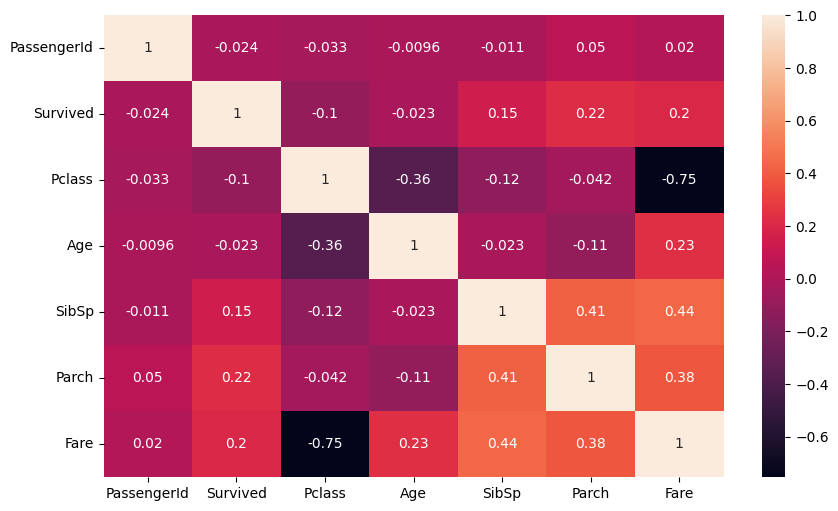

In [34]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df1,annot=True);

In [35]:
df1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.275780,-0.015308,-0.108844,-0.286647,-0.199189,-0.119833
Survived,-0.275780,1.000000,-0.242175,-0.138582,0.132462,0.239201,0.269670
Pclass,-0.015308,-0.242175,1.000000,-0.614091,-0.387716,-0.241078,-0.944047
Age,-0.108844,-0.138582,-0.614091,1.000000,-0.132461,-0.326862,0.387592
SibSp,-0.286647,0.132462,-0.387716,-0.132461,1.000000,0.594328,0.606602
Parch,-0.199189,0.239201,-0.241078,-0.326862,0.594328,1.000000,0.480833
Fare,-0.119833,0.269670,-0.944047,0.387592,0.606602,0.480833,1.000000


# Model Building

In [43]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    int64  
 4   Sex          417 non-null    int64  
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    int64  
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 39.1 KB


In [46]:
# feature scaling
from sklearn.model_selection import train_test_split
# spliting the data
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [47]:
# count the number rows and columns for x_test
x_test.shape

(84, 10)

In [48]:
# count the number rows and columns for x_train
x_train.shape

(333, 10)

In [49]:
# count the number rows for y_test
y_test.shape

(84,)

In [50]:
# count the number rows for y_train
y_train.shape

(333,)

# Scaling

In [51]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)

(333, 10)
(84, 10)


## Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable.


# LogisticRegression

In [52]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)

LogisticRegression(random_state=0)

In [53]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(rescale_x_test)
print("logistic regression training set:",logreg.score(x_train, y_train)*100)
print("logistic regression testing set:",logreg.score(x_test, y_test)*100)
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))

logistic regression training set: 33.633633633633636
logistic regression testing set: 32.142857142857146
Accuracy of logistic regression classifier:  71.42857142857143
[[ 5  0 11]
 [ 0  0 10]
 [ 3  0 55]]


# Decision Tree



In [59]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train)*100)
print("decision tree testing set:",classification.score(x_test, y_test)*100)
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test, y_pred))

decision tree training set: 100.0
decision tree testing set: 84.52380952380952
Accuracy: 84.52380952380952
[[14  0  2]
 [ 1  8  1]
 [ 8  1 49]]


# XG boost

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("xg training set:",xg.score(x_train, y_train)*100)
print("xg testing set:",xg.score(x_test, y_test)*100)
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test, y_pred))

xg training set: 100.0
xg testing set: 89.28571428571429
Accuracy: 89.28571428571429
[[16  0  0]
 [ 0  7  3]
 [ 6  0 52]]


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("rf training set:",rf.score(x_train, y_train)*100)
print("rf testing set:",rf.score(x_test, y_test)*100)
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test)*100)
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 100.0
rf testing set: 86.90476190476191
Random Forest classifier has accuracy of:  86.90476190476191
[[16  0  0]
 [ 0  4  6]
 [ 5  0 53]]


# conclusion

Hence we got accuracy on different classification

-logisitic regression got accuracy 71%

-DecisionTree got accuracy 85%

-xg boosting got accuracy 89%

-Random Forest got accuracy 87%

we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

After feature selection we used four machine learning models and achieved quite good accuracy 89% in xg boosting for predicting the credit card approval.
